In [207]:
import torch
import torch.nn as nn
from torch.distributions import Independent, Normal
import matplotlib.pyplot as plt
import torch.optim as optim

%config InlineBackend.figure_formats = ['png']

In [2]:
input_dim = 10
torch.arange(input_dim, 0, -1)

tensor([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [3]:
torch.randint(low=1, high=10, size=(100, ))

tensor([2, 6, 5, 3, 1, 8, 8, 8, 6, 7, 6, 3, 6, 4, 8, 3, 5, 4, 9, 2, 1, 4, 5, 2,
        7, 1, 9, 6, 5, 1, 7, 8, 1, 5, 4, 3, 4, 1, 1, 3, 6, 2, 7, 1, 1, 1, 3, 5,
        8, 7, 4, 9, 3, 7, 6, 5, 2, 4, 1, 1, 3, 8, 9, 2, 1, 1, 8, 2, 6, 5, 1, 4,
        8, 5, 4, 1, 4, 4, 1, 4, 9, 8, 5, 9, 4, 4, 3, 1, 8, 1, 1, 7, 9, 7, 5, 3,
        7, 8, 1, 7])

In [4]:
output_dim = 10

output_indices = torch.zeros(output_dim)
output_indices[:input_dim] = torch.arange(1, input_dim+1)
output_indices[input_dim:] = input_dim

generating masks need to be done for all layers, because otherwise some nodes could get wasted

masks for all layers can be organized 

In [5]:
def made(W, M, x):
    pass

In [6]:
class MADE

SyntaxError: invalid syntax (2792984855.py, line 1)

QUESTIONS:

- Implementing base dist
- Compute masks, create objects called masked linear (since we are not randomly sampling masks per iteration)
- Implement output dist

## MAE as a distribution

- Must be able to do a few things
    - Computing log prob of a sample (under its own base distribution)
    - Be able to generate (from its own base distribution or otherwise)
    - Be able to compute random numbers to be modelled by later layers and logabsdet
    
On the other hand, MixtureOfGaussiansMADE only needs to do it for itself

In [7]:
def create_degrees():
    pass

def create_masks():
    pass

def create_weights():
    pass

In [8]:
nn.Linear??

In [9]:
class MaskedLinear(nn.Linear):
    
    def __init__(self, mask, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.mask = mask
        assert self.mask.shape == (self.out_features, self.in_features)
    
    def forward(self, input):
        return F.linear(input, self.weight * self.mask, self.bias)

In [10]:
ml = MaskedLinear(torch.randn(32, 64), out_features=32, in_features=64)
ml(torch.randn(100, 64))

NameError: name 'F' is not defined

In [209]:
rng

NameError: name 'rng' is not defined

In [30]:
import torch.nn.functional as F

In [31]:
import numpy as np

In [32]:
class MaskedLinear(nn.Linear):
    
    def __init__(self, mask, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.mask = mask
        assert self.mask.shape == (self.out_features, self.in_features)
    
    def forward(self, input):
        return F.linear(input, self.weight * self.mask, self.bias)

In [33]:
def create_degrees(n_inputs, n_hiddens, input_order, mode):
    """
    Generates a degree for each hidden and input unit. A unit with degree d can only receive input from units with
    degree less than d.
    :param n_inputs: the number of inputs
    :param n_hiddens: a list with the number of hidden units
    :param input_order: the order of the inputs; can be 'random', 'sequential', or an array of an explicit order
    :param mode: the strategy for assigning degrees to hidden nodes: can be 'random' or 'sequential'
    :return: list of degrees
    """

    degrees = []

    # create degrees for inputs
    if isinstance(input_order, str):

        if input_order == 'random':
            degrees_0 = np.arange(1, n_inputs + 1)
            rng.shuffle(degrees_0)

        elif input_order == 'sequential':
            degrees_0 = np.arange(1, n_inputs + 1)

        else:
            raise ValueError('invalid input order')

    else:
        input_order = np.array(input_order)
        assert np.all(np.sort(input_order) == np.arange(1, n_inputs + 1)), 'invalid input order'
        degrees_0 = input_order
    degrees.append(degrees_0)

    # create degrees for hiddens
    if mode == 'random':
        for N in n_hiddens:
            min_prev_degree = min(np.min(degrees[-1]), n_inputs - 1)
            degrees_l = rng.randint(min_prev_degree, n_inputs, N)
            degrees.append(degrees_l)

    elif mode == 'sequential':
        for N in n_hiddens:
            degrees_l = np.arange(N) % max(1, n_inputs - 1) + min(1, n_inputs - 1)
            degrees.append(degrees_l)

    else:
        raise ValueError('invalid mode')

    return degrees

In [213]:
nn.ELU(torch.randn(5))

ELU(alpha=tensor([ 0.7696,  0.6143,  0.4322, -1.4589,  0.4153]))

In [191]:
def create_masks(degrees):
    
    masks = []
    
    for d0, d1 in zip(degrees[:-1], degrees[1:]):
        
        masks.append(torch.IntTensor(d1.reshape(-1, 1) >= d0.reshape(1, -1)))
        
    masks.append(torch.IntTensor(degrees[0].reshape(-1, 1) > degrees[-1].reshape(1, -1)))
    
    return masks

In [192]:
class GaussianMADE(nn.Module):
    
    def __init__(self, data_dim, hidden_dims):
    
        super().__init__()
        
        self.data_dim = data_dim
        self.hidden_dims = hidden_dims

        # create degrees and masks
        
        degrees = create_degrees(data_dim, hidden_dims, input_order="sequential", mode="sequential")
        weight_masks = create_masks(degrees)
        
        # create masked linear layers

        hidden_layers = []
        
        hidden_layers.append(
            MaskedLinear(weight_masks[0], in_features=data_dim, out_features=self.hidden_dims[0])
        )
        hidden_layers.append(nn.ELU())
        
        for i, (h0, h1) in enumerate(zip(self.hidden_dims[:-1], self.hidden_dims[1:])):
            hidden_layers.append(
                MaskedLinear(weight_masks[i+1], in_features=h0, out_features=h1)
            )
            hidden_layers.append(nn.ELU())
            
        self.hidden = nn.Sequential(*hidden_layers)
        
        # parametrize the output distributions
        
        self.mu = MaskedLinear(
            weight_masks[-1], in_features=self.hidden_dims[-1], out_features=self.data_dim
        )
        self.alpha = MaskedLinear(
            weight_masks[-1], in_features=self.hidden_dims[-1], out_features=self.data_dim
        )
        
        # base distribution
        
        self.base_dist = Independent(Normal(torch.zeros(data_dim), torch.ones(data_dim)), 1)
        
    def _calc_mu_and_alpha(self, x):
        """
        x: (bs, D)
        h: (bs, H)
        mu: (bs, D)
        alpha: (bs, D)
        """
        h = self.hidden(x)
        return self.mu(h), self.alpha(h)
        
    def calc_u_and_logabsdet(self, x):
        """Only call this method directly when stacking GaussianMADEs into an MAF"""
        mu, alpha = self._calc_mu_and_alpha(x)
        u = (x - mu) * torch.exp(-alpha)
        logabsdet = -alpha.sum(dim=1)
        return u, logabsdet
        
    def log_prob(self, x):
        u, logabsdet = self.calc_u_and_logabsdet(x)
        log_prob_under_u = self.base_dist.log_prob(u)
        log_prob = log_prob_under_u + logabsdet
        return log_prob
    
    def rsample(self, u=None):
        raise NotImplementedError

In [200]:
made

GaussianMADE(
  (hidden): Sequential(
    (0): MaskedLinear(in_features=2, out_features=100, bias=True)
    (1): ELU(alpha=1.0)
    (2): MaskedLinear(in_features=100, out_features=100, bias=True)
    (3): ELU(alpha=1.0)
  )
  (mu): MaskedLinear(in_features=100, out_features=2, bias=True)
  (alpha): MaskedLinear(in_features=100, out_features=2, bias=True)
)

In [199]:
made = GaussianMADE(data_dim=2, hidden_dims=[100, 100])
opt = optim.Adam(made.parameters(), lr=1e-3)

for i in range(1, 10001):

    loss = - made.log_prob(data2).mean()
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    if (i % 100) == 0:
        print(i, float(loss))

100 4.196906566619873
200 3.9815242290496826
300 3.8387186527252197
400 3.7432780265808105
500 3.676067590713501
600 3.62844181060791
700 3.59468674659729
800 3.5706496238708496
900 3.5536320209503174


KeyboardInterrupt: 

In [195]:
data2 = torch.zeros(10000, 2)
for i in range(10000):
    x2 = torch.randn(1) * 2
    x1 = torch.randn(1) + (1/4 * x2 ** 2)
    data2[i, 0] = x2
    data2[i, 1] = x1

In [196]:
import seaborn as sns

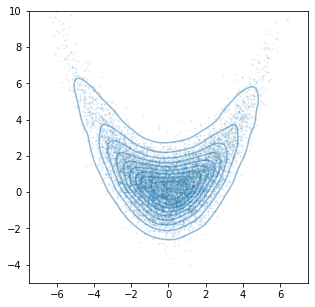

In [208]:
plt.figure(figsize=(5, 5))
plt.scatter(data2[:, 0], data2[:, 1], s=1, alpha=0.1)
sns.kdeplot(x=data2[:, 0], y=data2[:, 1], alpha=0.5)
plt.xlim(-7.5, 7.5)
plt.ylim(-5, 10)
plt.show()

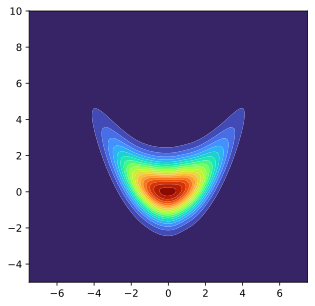

In [205]:
xs = torch.linspace(-7.5, 7.5, 100)
ys = torch.linspace(-5, 10, 100)
xxs, yys = torch.meshgrid(xs, ys)
xxs_flat, yys_flat = xxs.reshape(-1, 1), yys.reshape(-1, 1)
grid = torch.hstack([xxs_flat, yys_flat])
with torch.no_grad():
    log_probs = made.log_prob(grid)
    
plt.figure(figsize=(5, 5))
plt.contourf(xxs.numpy(), yys.numpy(), log_probs.exp().numpy().reshape(100, 100), levels=20, cmap="turbo")
plt.xlim(-7.5, 7.5)
plt.ylim(-5, 10)
plt.show()

In [419]:
class MixtureOfGaussiansMADE(nn.Module):
    
    def log_prob(self, x):
        pass
        
    def rsample(self):
        pass

In [407]:
import numpy as np

In [444]:
degrees = create_degrees(5, [10, 10, 10, 10], input_order="sequential", mode="sequential")

In [481]:
len(create_masks(degrees))

5

How is u computed for MOGs?

In [359]:
w = [torch.randn(5, 2), torch.randn(3, 4)]

a = list(map(nn.Parameter, w))

In [360]:
list(GaussianMade(5).parameters())

[Parameter containing:
 tensor([[-0.4211, -1.1352, -0.2153, -0.0512, -0.2206],
         [ 0.3808, -1.0705, -1.2589, -0.5090,  0.1565],
         [-0.4632, -1.5125,  0.2252, -0.8396, -2.0231],
         [-0.2682, -0.2012, -0.1800, -1.4256,  1.4744],
         [ 1.4342,  1.8380, -1.1120,  0.7757, -0.6627]], requires_grad=True)]

In [253]:
#arnn = MaskedNN(data_dim=28*28, hidden_dims=[12, 75, 68, 10000])

In [202]:
data_dim = 28*28
base_dist = Independent(Normal(torch.zeros(data_dim), torch.ones(data_dim)), 1)
base_dist.log_prob(torch.zeros(64, data_dim)).shape

torch.Size([64])

In [189]:
class MAF(nn.Module):
    
    """
    Masked Autoregressive Flow as a distribution
    Include MADE as a base case
    TODO; Allows for different output distribution; how does the original code parametrize GMMs?
    """
    
    def __init__(
        self, 
        data_dim,
        n_layers, 
        hidden_sizes,
        mask_mode
    ):
        self.base_dist = Independent(Normal(torch.zeros(data_dim), torch.ones(data_dim)), 1)
        self.layers = [
            AutoregressiveNN(data_dim, hidden_sizes, mask_mode) for _ in range(n_layers)
        ]
    
    def log_prob(self, x):
        bs = x.shape[0]
        log_prob = torch.zeros(bs)
        for layer in self.layers:
            x, logabsdet = self.layer.pullback(x)  # f^{-1}
            log_prob += logabsdet  # logabsdet of f^{-1}
        log_prob_under_base_dist = self.base_dist.log_prob(x)
        log_prob += log_prob_under_base_dist
        return log_prob + logabsdet
    
    def rsample(self, n_samples):
        u = self.base_dist.rsample()
        for layer in self.layers[::-1]:
            u = self.layer.pushforward(u)
        return u

In [169]:
# assuming that the weight matrix has shape (32, 64)

In [65]:
# assign a number to each input
input_indices = torch.arange(0, 64).reshape(1, 64)

# assign a number to each output

In [66]:
output_indices = torch.randint(low=0, high=63, size=(32, 1))

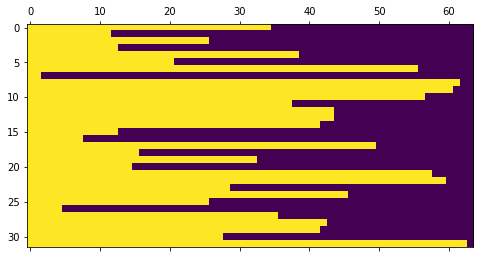

In [67]:
plt.matshow((output_indices >= input_indices).numpy())
plt.show()

In [254]:
def diagonal_mog_1d_loglik(x, mu, log_std, log_pi):
    """
    :param x: (1)
    :param mu: (number of components)
    :param log_std: (number of components)
    :param log_pi: (number of components)
    :return: (1)
    """
    return torch.logsumexp(
        log_pi + (-log_std - 0.5 * torch.log(torch.Tensor([2.]) * torch.pi) - 0.5 * ((x - mu) / log_std.exp()) ** 2),
        dim=0
    )

In [259]:
mog_1d_loglik_batch = torch.vmap(mog_1d_loglik, (0, 0, 0, 0), 0)

In [260]:
mog_loglik_one_example(
    torch.randn(1), torch.randn(10), torch.randn(10), F.log_softmax(torch.randn(10), dim=0)
)

tensor(-3.3999)

In [261]:
D = 2

mog_1d_loglik_batch(
    torch.randn(2, 1), torch.randn(2, 10), torch.randn(2, 10), F.log_softmax(torch.randn(2, 10), dim=1)
)

tensor([-0.8801, -2.2123])

In [270]:
import torch.distributions as D

bs = 64
C = 10
data_dim = 2

mix = D.Categorical(torch.ones(10))
comp = D.Normal(torch.randn(10), torch.rand(10))

gmm = D.MixtureSameFamily(mix, comp)

In [271]:
gmm.sample()

tensor(1.1019)